<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%204/Assignment_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second iteration

We noticed in the first iteration that the best validation loss and accuracy was not obtained in the end. This meant even though we found a good model while performing gradient descent we dropped it since it was not where the process finally exited. In this iteration we add functionality to store the best model ( measured by validation accuracy ) found over epochs and use the same going forward. This is the only change implemented in this iteration.

### Why is this the only change implemented?
<br> I feel getting the best model out of an existing process is the most basic change one could do. More importantly we are not even making any changes to the model through this change. We are merely saving and extracting the best model we found through our execution.

In this iteration our number of parameters dont change and remain at 7,778 and our validation accuracy rises to 99.00% compared to 98.80% from the first iteration.

### High level stats:

Total number of params: 7,778
<br>Total number of trainable params: 7,778
<br>Validation accuracy: 98.11%
<br>Training accuracy: 99.38%

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Installing Keras and importing into current runtime environment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing libraries and functions required for the program

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading the MNIST dataset. Note that this dataset comes with a ready made train and test set.

(60000, 28, 28)


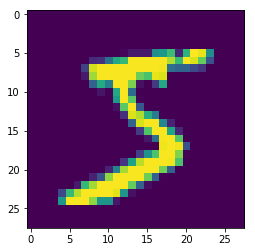

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing the first training image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping images from 28x28 to 28x28x1. This change needs to be done since convolution expects a 3 dimensional matrix.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bringing the values of pixels to 0-255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the first ten labels on the training set. Note that these are numbers at this point. More importantly these numbers have an ordinality amongst them

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the numerical labels to categorical values. This is important since the classes 0-9 are just different classes and have no inherent order amongst them ( i.e 7 is not a lesser class than 8 in any way with respect to digit classification )

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Seeing the categorical representation of the labels for the first ten training images

In [10]:
from keras.layers import Activation, BatchNormalization, Dropout
dropout_rate = 0.5


model = Sequential()

# Convolution block 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) #3x3x1x10 kernel - 26x26x10 image - Receptive Field 3x3
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x10x16 kernel - 24x24x16 image - Receptive Field 5x5

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 12x12x16 image - Receptive Field 10x10
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 12x12x8 image - Receptive Field 10x10

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x8x16 kernel - 10x10x16 image - Receptive Field 12x12
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 8x8x16 image - Receptive Field 14x14

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 4x4x16 image - Receptive Field 28x28
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 4x4x10 image - Receptive Field 28x28

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 2x2x16 image - Receptive Field 28x28

model.add(Convolution2D(10, (2, 2))) # 2x2x16x10 kernel - 1x1x10 image

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


No change here compared to the previous iterations

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Compiling the model for training

In [13]:
from keras.callbacks import ModelCheckpoint
filepath="weights.iter2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 315us/step - loss: 0.2470 - acc: 0.9211 - val_loss: 0.0759 - val_acc: 0.9764

Epoch 00001: val_acc improved from -inf to 0.97640, saving model to weights.iter2.best.hdf5
Epoch 2/30
60000/60000 [==============================] - 20s 341us/step - loss: 0.0807 - acc: 0.9749 - val_loss: 0.0585 - val_acc: 0.9804

Epoch 00002: val_acc improved from 0.97640 to 0.98040, saving model to weights.iter2.best.hdf5
Epoch 3/30
60000/60000 [==============================] - 21s 346us/step - loss: 0.0611 - acc: 0.9811 - val_loss: 0.0629 - val_acc: 0.9805

Epoch 00003: val_acc improved from 0.98040 to 0.98050, saving model to weights.iter2.best.hdf5
Epoch 4/30
60000/60000 [==============================] - 19s 323us/step - loss: 0.0494 - acc: 0.9840 - val_loss: 0.0373 - val_acc: 0.9877

Epoch 00004: val_acc improved from 0.98050 to 0.98770, savin

In the following section we set up functionality to keep track of the best model ( measured by validation accuracy ) seen so far and store its parameters to a file.

```
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
```
This functionality is implemented through a callback function. This function gets called at the end of every epoch. The checkpoint function/object measures the validation accuracy ( specified through val_acc ), keeps track of the best so far and stores the latest model after the epoch if it beats the current best.

After 30 epochs, the max validation accuracy reached was 99.11%.

In [0]:
model.load_weights("weights.iter2.best.hdf5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loading the best model weights ( according to validation accuracty ) stored during the training phase

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Evaluate the model on the testing dataset

In [16]:
print(score)

[0.03052619675468595, 0.9911]


Printing the score of the model on the testing dataset. The first number is the value of the loss function. The latter is the test accuracy.

In [17]:
model.evaluate(X_train, Y_train, verbose=0)

[0.020098386924987426, 0.9938666666666667]

Evaluating the model on the training dataset to see what the achieved training accuracy is. Surprisingly this number doesnt match with the number printed last in the training logs. I dont understand why there is a discrepancy

In [0]:
y_pred = model.predict(X_test)

Computing the predicted classifications for the testing dataset

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[9.10484362e-12 5.83305140e-11 6.31283958e-09 4.10064338e-08
  1.11776488e-09 1.79431058e-12 7.20912254e-19 9.99999881e-01
  4.54265319e-08 8.94988332e-08]
 [5.69737111e-08 1.18849229e-07 9.99999642e-01 3.19230908e-09
  5.22517105e-08 3.37702262e-12 7.36625161e-09 1.30025608e-08
  6.68452387e-08 2.72520857e-13]
 [5.02039029e-07 9.99812305e-01 2.23287338e-06 6.36250519e-09
  6.62070015e-05 1.56537624e-07 2.18334253e-06 4.72768988e-05
  6.83153412e-05 8.13110432e-07]
 [9.99997377e-01 2.46393672e-13 8.77266615e-09 1.01408126e-13
  1.19932939e-10 2.45225031e-08 2.65734434e-06 6.06755063e-11
  1.01884154e-08 5.40928280e-09]
 [1.26727101e-12 1.19431912e-11 3.06612935e-09 2.13099923e-13
  9.99990582e-01 2.65447414e-10 4.79204065e-10 6.24745394e-12
  3.33994166e-08 9.41170219e-06]
 [5.82659574e-08 9.99981999e-01 6.73328557e-08 5.04808140e-11
  3.03772163e-06 3.36486150e-09 9.53022052e-08 6.27664031e-06
  8.23137452e-06 2.06464392e-07]
 [2.70251351e-13 1.58280766e-08 7.14961175e-07 2.28582832e

Comparing the labels computed by our model and that given in the dataset.

Note that for the first element, the target label in the dataset is 11. The output by the model, is in the categorical form described earlier. One can see that first output peaks at index 8 which corresponds to the digit 7.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Copying the layers in a dict for visualization in the next step

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

Predefined function for visualizing how an image is processed by a particular layer in the network.

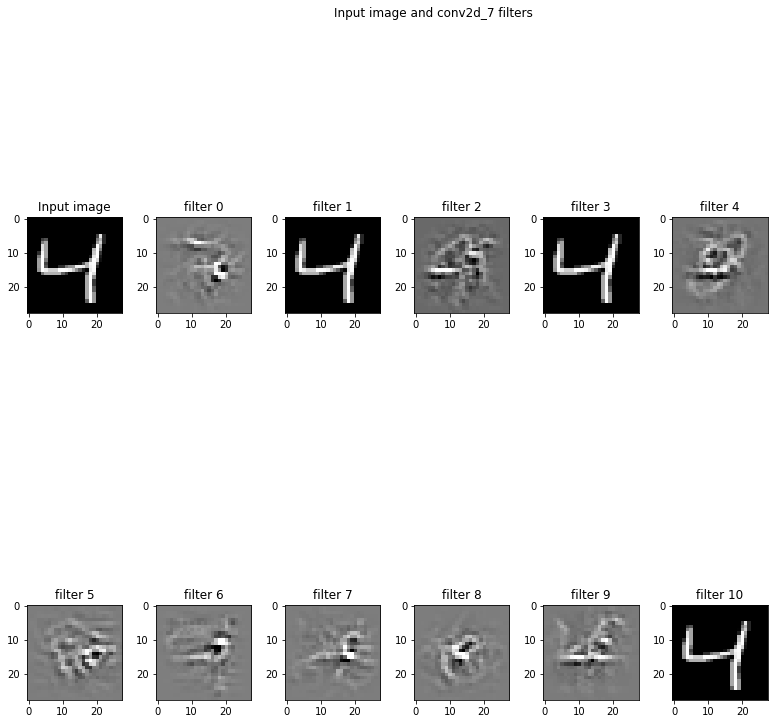

In [22]:
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_7')

Visualization of the 7th convolution layer ( 3x3x10x32 kernel ). One can see that the exact input image itself shows up in many kernels. This is surprising. I currently dont understand the significance of it